<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/7.%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%EC%9D%98%EC%A0%84%EC%B2%98%EB%A6%AC%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7. 자연어 처리의 전처리 활용

##7.1 영화 선택해서 리뷰 긁어오기

In [0]:
import requests
from bs4 import BeautifulSoup

자전차왕 엄복동 리뷰를 긁어보자

In [0]:
test_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=159070&type=after&page=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20200515103320" rel="stylesheet" type="text/css">
<link href="/css/movie_tablet.css?20200515103320" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20200515103320" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20200515103320" type="text/javascript"></script>
</link></head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="159070"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div clas

In [0]:
score_result = html.find('div', {'class': 'score_result'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="star_score">
<span class="st_off"><span class="st_on" style="width:10.0%"></span></span><em>1</em>
</div>
<div class="score_reple">
<p>
<!-- 스포일러 컨텐츠로 처리되는지 여부 -->
<span id="_filtered_ment_0">
														
															
															
																곧 있으면 자동차왕곽한구 나올 기새네 
															
														
														
													</span>
</p>
<dl>
<dt>
<em>
<a href="#" onclick="javascript:showPointListByNid(15330418, 'after');parent.clickcr(this, 'ara.uid', '', '', event); return false;" target="_top">
<span>초코파이(andy****)</span>
</a>
</em>
<em>2019.02.27 11:06</em>
</dt>
<dd>
<a class="go_report2" href="#" onclick="parent.clickcr(this, 'ara.report', '', '', event); common.report('false','andy****', '4aQQw1RKM8ZnN4Irk9Wp4CdfqQCNqb9gilEaP6N2xJc=', '곧 있으면 자동차왕곽한구 나올 기새네 ', '15330418', 'point_after', false);return false;"><em>신고</em></a>
</dd>
</dl>
</div>
<div class="btn_area">
<a class="_sympathyButton" href="#" onclick="parent.clickcr(this, 'ara.sym', '', '', even

In [0]:
review_text = lis[0].find('p').getText()
review_text.strip()

'곧 있으면 자동차왕곽한구 나올 기새네'

In [0]:
score = lis[0].find('em').getText()
score

'1'

In [0]:
for lis_ in lis:
    comment = lis_.find('p').getText().strip()
    score = lis_.find('em').getText()
    print(comment,score)

곧 있으면 자동차왕곽한구 나올 기새네 1
배우 정지훈... 히트작 구경한 지가  언제냐... 이 영화 망하고 나면 그나마도 못 나오겠네. 집에서 태희 누나한테 잘 해주고  좋은 데 많이 놀러 다녀. 행복이 최고다^^ 모아둔 돈 많잖아. 1
이젠 관객들 푯값도 훔쳐가네 1
전차왕 계엄폭동 ㅋㅋㅋ 1
리얼,악녀,염력,인랑,물괴,창궐,엄복동 1
이런영화에 100억을 투자를 한거라구??정지훈 연기 왜이렇구 못하냐??  술먹고 인스타할 시간에, 연기공부좀 해라!! 술주정으로 인스타 하지 말구그리고 주식먹튀한거 사과하고  배우활동 하길뻔뻔하다 참.. ㅉㅉ 1
1점을 준 이유는 0점이 없기 때문이다 1
이거보지말고 피시방7시간이 좋습니다. 1
실제 엄복동 이라는 인물이 절도범에 장물아비 때문에 감옥간 사실은 알고 영화 개봉하는거임??이제 범죄자가 영웅이되어 영화까지 만들어지는 세상이네 ㅋㅋㅋ 1
제목만 봐도 스트레스가...애국심 마켓팅 그만합시다3.1운동 100주년 맞춰 개봉하면 천만관객 동원할 줄 알았나요? 1


In [0]:
import time
import pandas as pd
score_df = pd.DataFrame(columns=['comment','score'])
score_df

,comment,score


In [0]:
page_num = 1
index = 0
while True:
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=159070&type=after&page="+f'{page_num}'
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'score_result'})
    lis = score_result.findAll('li')
    for lis_ in lis:
        comment = lis_.find('p').getText().strip().replace("\n","").replace('\t','').replace('\r','')
        comment = comment.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
        comment = comment.replace("관람객","")
        comment = comment.replace("스포일러가 포함된 감상평입니다.","")
        comment = comment.replace("감상평 보기","")
        score = lis_.find('em').getText() # 1점부터 10점까지 평점이 매겨진다.
        score = str(int(score) - 1) # 모델에 0~9로 넣어줘야 한다.
        if ('관람객' in comment) or ('관람객' in score):continue
        score_df.loc[index] = [comment,score]
        if index%300==0:
            print(f'{index}의 리뷰를 탐색함')
            print(comment,score)
            print('-------------------'*3)
        index+=1
        
    page_num+=1
    if index>8000:break

0의 리뷰를 탐색함
곧 있으면 자동차왕곽한구 나올 기새네 0
---------------------------------------------------------
300의 리뷰를 탐색함
스토리가 너무 엉성해요ㅠㅠ 0
---------------------------------------------------------
600의 리뷰를 탐색함
정석원 뽕맞은 연기가 젤 리얼함~ 4
---------------------------------------------------------
900의 리뷰를 탐색함
환불및 정신적 피해 보상을 요구함니다 아직도 충격이 가시질 않는 쓰레기 망작 영화.  사죄하라 0
---------------------------------------------------------
1200의 리뷰를 탐색함
강소라씨 팬으로써 말씀드리는데 제발 작품좀 가려하세요~~ 변혁의 사랑하고 엄복동은 너무 심했어요~ 0
---------------------------------------------------------
1500의 리뷰를 탐색함
1점도 아까워요. 아이티브에서 무료일때 보삼 1
---------------------------------------------------------
1800의 리뷰를 탐색함
1점 주고 갑니다ㅡㅡㅋㅋ 0
---------------------------------------------------------
2100의 리뷰를 탐색함
영화 내적으로맛 보았을 때 매력적인 케릭터와 소재. 의외로 자전차 경주 촬영이 괜찮다. 영화를 순식간에 무너뜨리는건 후반부 과한 신파와 뻔한 일제시대의 클리셰들. 4
---------------------------------------------------------
2400의 리뷰를 탐색함
평점 조작해서 극과극을 달리는 영화 역사에 남을거다 0
---------------------------------------------------------
2700의 리뷰를 탐색함
재미1도

In [0]:
score_df.head()

,comment,score
0,곧 있으면 자동차왕곽한구 나올 기새네,0
1,배우 정지훈... 히트작 구경한 지가 언제냐... 이 영화 망하고 나면 그나마도 ...,0
2,이젠 관객들 푯값도 훔쳐가네,0
3,전차왕 계엄폭동 ㅋㅋㅋ,0
4,"리얼,악녀,염력,인랑,물괴,창궐,엄복동",0


##7.2 리뷰 전처리

In [0]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 3.6MB 50.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-06-01 11:59:03--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

In [0]:
from konlpy.tag import Mecab
import numpy as np
import matplotlib.pyplot as plt

stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','.','고','하','다','보','을','..','?','게','지','점','안','만','있','!','습니다']
tokenizer = Mecab()

In [0]:
print('전체 샘플의 수 : {}'.format(len(score_df)))

전체 샘플의 수 : 8010


In [0]:
temp = tokenizer.morphs(score_df.loc[2,'comment'])
print(temp)
temp = [word for word in temp if not word in stopwords]
print(temp)

['이젠', '관객', '들', '푯값', '도', '훔쳐', '가', '네']
['이젠', '관객', '푯값', '훔쳐', '네']


In [0]:
tokenized=[]
for sentence in score_df['comment']:
    temp = []
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

print(tokenized[:10])

[['곧', '으면', '자동차', '왕', '곽한구', '나올', '기', '새', '네'], ['배우', '정지훈', '히트', '작', '구경', '언제', '냐', '영화', '망하', '나', '면', '그나마', '못', '나오', '겠', '네', '집', '에서', '태희', '누나', '한테', '해', '주', '좋', '데', '많이', '놀', '러', '다녀', '행복', '최고', '^^', '모아', '둔', '돈', '많', '잖아'], ['이젠', '관객', '푯값', '훔쳐', '네'], ['전차', '왕', '계엄', '폭동', 'ㅋㅋㅋ'], ['리얼', ',', '악녀', ',', '염력', ',', '인', '랑', ',', '물괴', ',', '창궐', ',', '엄복동'], ['이런', '영화', '100', '억', '투자', '거', '라구', '정지훈', '연기', '왜', '이렇', '구', '못하', '냐', '술', '먹', '인', '스타', '할', '시간', ',', '연기', '공부', '해라', '술주정', '인', '스타', '말', '구', '그리고', '주식', '먹', '튀', '거', '사과', '배우', '활동', '길', '뻔뻔', '참', 'ㅉㅉ'], ['1', '준', '이유', '0', '없', '기', '때문'], ['이거', '말', '피시방', '7', '시간', '좋'], ['실제', '엄복동', '라는', '인물', '절도범', '장물아비', '때문', '감옥', '간', '사실', '알', '영화', '개봉', '거', '임', '이제', '범죄자', '영웅', '되', '어', '영화', '까지', '만들', '어', '세상', '네', 'ㅋㅋㅋ'], ['제목', '봐도', '스트레스', '애국심', '마켓', '팅', '그만', '합시다', '3', '1', '운동', '100', '주년', '맞춰', '개봉', '면', '천만', '관객', '동원', '할', '줄'

In [0]:
from nltk import FreqDist

vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 9715


In [0]:
vocab['그만']

116

In [0]:
vocab.most_common

<bound method Counter.most_common of FreqDist({'영화': 3274, '평점': 825, '봤': 778, '1': 742, ',': 741, '나': 736, '없': 724, '는데': 710, '거': 669, '었': 663, ...})>

In [0]:
vocab_size = 1000
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 1000


In [0]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

print(encoded[:10])

[[892, 104, 332, 66, 333, 334, 55, 985, 12], [45, 74, 0, 237, 0, 396, 22, 2, 497, 7, 32, 801, 87, 92, 43, 12, 370, 53, 731, 0, 335, 78, 23, 16, 193, 177, 937, 195, 0, 0, 183, 202, 0, 0, 28, 89, 627], [564, 139, 0, 767, 12], [544, 66, 0, 319, 67], [268, 6, 0, 6, 608, 6, 58, 224, 6, 938, 6, 0, 6, 20], [50, 2, 187, 116, 361, 10, 0, 74, 41, 24, 0, 433, 648, 22, 536, 170, 58, 474, 68, 76, 6, 41, 0, 227, 0, 58, 474, 47, 433, 259, 517, 170, 689, 10, 0, 45, 0, 190, 0, 228, 447], [5, 246, 282, 103, 8, 55, 189], [115, 47, 0, 102, 76, 16], [649, 20, 152, 242, 594, 0, 189, 0, 576, 273, 48, 2, 209, 10, 124, 151, 407, 305, 44, 31, 2, 81, 37, 31, 577, 12, 67], [462, 178, 0, 251, 0, 0, 157, 939, 119, 5, 628, 187, 986, 0, 209, 32, 716, 139, 0, 68, 133, 48, 26, 256]]


리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 0
리뷰의 평균 길이 : 12.490762


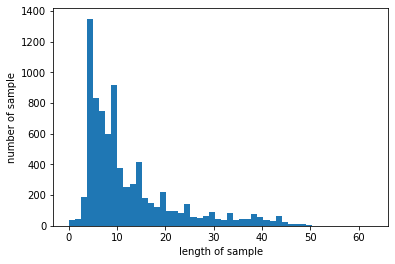

In [0]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [0]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.000000


In [0]:
print(encoded[:3])

[[892, 104, 332, 66, 333, 334, 55, 985, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [45, 74, 0, 237, 0, 396, 22, 2, 497, 7, 32, 801, 87, 92, 43, 12, 370, 53, 731, 0, 335, 78, 23, 16, 193, 177, 937, 195, 0, 0, 183, 202, 0, 0, 28, 89, 627, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [564, 139, 0, 767, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [0]:
from sklearn.utils import shuffle
shuffled_df = shuffle(score_df) # 셔플해준다.

In [0]:
train_df = shuffled_df.iloc[:6500] # 셔플해준 것을 뽑아보자.
test_df = shuffled_df.iloc[6500:]

train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [0]:
from torchtext import data # torchtext.data 임포트
from konlpy.tag import Mecab

# Mecab을 토크나이저로 사용
tokenizer = Mecab()

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [0]:
from torchtext.data import TabularDataset
train_data, test_data = TabularDataset.splits(
    path='.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('comment', TEXT), ('score', LABEL)], skip_header=True)

print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

print(vars(train_data[0]))

훈련 샘플의 개수 : 6500
테스트 샘플의 개수 : 1510
{'comment': ['그래도', '100', '만', '정도', '는', '찍', '지', '않', '을까', '했', '는데', 'ㅋㅋ', '평점', '여론', '보소', 'ㅋㅋ'], 'score': '0'}


In [0]:
TEXT.build_vocab(train_data, min_freq=1)
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 8727


In [0]:
TEXT.build_vocab(train_data, min_freq=20, max_size=1500)
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))
print(TEXT.vocab.stoi)

단어 집합의 크기 : 691
defaultdict(<function _default_unk_index at 0x7ff6b0a4b2f0>, {'<unk>': 0, '<pad>': 1, '.': 2, '이': 3, '영화': 4, '는': 5, '고': 6, '하': 7, '다': 8, '도': 9, '보': 10, '가': 11, '은': 12, '들': 13, '을': 14, '에': 15, '?': 16, '..': 17, '점': 18, '지': 19, '게': 20, '있': 21, '안': 22, '의': 23, '한': 24, '만': 25, '를': 26, '평점': 27, '!': 28, '습니다': 29, '봤': 30, ',': 31, '1': 32, '나': 33, '없': 34, '는데': 35, '거': 36, '네': 37, '었': 38, '으로': 39, 'ㅋㅋ': 40, '했': 41, '로': 42, '비': 43, '좋': 44, '네요': 45, '냐': 46, '어요': 47, '엄복동': 48, '재밌': 49, '주': 50, '너무': 51, '왜': 52, '았': 53, '아': 54, '잘': 55, '돈': 56, '적': 57, '어': 58, '같': 59, '면': 60, '음': 61, '진짜': 62, '볼': 63, '아니': 64, '만들': 65, '않': 66, '것': 67, '자전거': 68, '배우': 69, '감동': 70, '되': 71, '연기': 72, '겠': 73, '~': 74, '에서': 75, '알': 76, '반일': 77, '생각': 78, '기': 79, '수': 80, '말': 81, '이런': 82, '보다': 83, '과': 84, '사람': 85, '...': 86, '뽕': 87, '인': 88, '내': 89, '10': 90, '잼': 91, '라': 92, '지만': 93, '듯': 94, '왕': 95, '할': 96, '국': 97, '재미있': 98,

In [0]:
from torchtext.data import Iterator

batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.comment)
print(batch.score)

훈련 데이터의 미니 배치 수 : 1300
테스트 데이터의 미니 배치 수 : 302
tensor([[102,  23,   0, 637,  12,  90,  18,  28,   0,   0,   5, 434,   9, 527,
         402,   0,   9, 596,   0, 290],
        [ 98,   8, 121, 146,   3, 121, 101,  98,   8,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1],
        [199, 375,   0, 552, 375, 265, 317,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1],
        [  0, 462,   0,  30,   8,   2, 522,  18,   3, 390,   3,   8,   2,  89,
          56,  89,   6,  30, 135, 175],
        [ 99,  51,  49,   8,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1]])
tensor([9, 0, 0, 2, 0])


##7.3 분류 모델 만들기

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

learning_rate = 0.001
training_epochs = 10

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(20, 32),
                                   nn.ReLU(),
                                   nn.Linear(32, 16),
                                   nn.ReLU(),
                                   nn.Linear(16, 10))

    def forward(self, x):
        out = self.layer(x)
        return out

In [0]:
model = Classifier()
criterion = torch.nn.CrossEntropyLoss()    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
plot_list = {'train':[], 'test':[]}

for epoch in range(training_epochs):
  model.train()
  train_losses = []
  for batch_number, (X, y) in enumerate(train_loader): # 미니 배치 단위로 꺼내온다. X는 미니 배치, y는 레이블
    #print(batch_number)
    X = X.to(torch.float)

    optimizer.zero_grad()
    output = model(X)
    train_loss = criterion(output, y)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

  with torch.no_grad():
    model.eval()
    test_losses = []
    for batch_number, (X, y) in enumerate(test_loader):
      X = X.to(torch.float)

      output = model(X)
      test_loss = criterion(output, y)
      test_losses.append(test_loss.item())

  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['test'].append(sum(test_losses)/len(test_losses))

  print(f'{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}')
  print(f'{epoch+1} epoch test loss = {sum(test_losses)/len(test_losses)}')
  print('-'*50)

1 epoch train loss = 2.1911277096088115
1 epoch test loss = 1.4821106738207357
--------------------------------------------------
2 epoch train loss = 1.3527430719137192
2 epoch test loss = 1.4111567570871075
--------------------------------------------------
3 epoch train loss = 1.3121235609054565
3 epoch test loss = 1.3837384109860225
--------------------------------------------------
4 epoch train loss = 1.2929543191653032
4 epoch test loss = 1.3639959560719548
--------------------------------------------------
5 epoch train loss = 1.2807631388535867
5 epoch test loss = 1.358644310607026
--------------------------------------------------
6 epoch train loss = 1.2701761455948537
6 epoch test loss = 1.363889634411856
--------------------------------------------------
7 epoch train loss = 1.2615089517373306
7 epoch test loss = 1.362815976537616
--------------------------------------------------
8 epoch train loss = 1.254903044448449
8 epoch test loss = 1.377229382068116
----------------

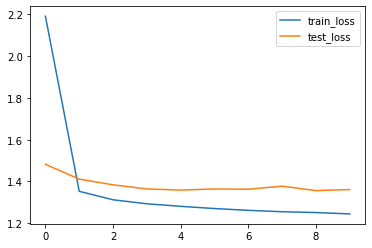

In [0]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['test'], label='test_loss')
plt.legend()
plt.show()